In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("spam (1).csv",encoding="ISO-8859-1") # Lodign the dataset

In [3]:
data.shape # showing who much rows and columns present in the dataset

(5572, 5)

In [4]:
data.sample(5) # showing random 5 values

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
795,ham,it's really getting me down just hanging around.,NaN,NaN,NaN
718,spam,You have WON a guaranteed å£1000 cash or a å£2...,NaN,NaN,NaN
4995,ham,Happy new year. Hope you are having a good sem...,NaN,NaN,NaN
3836,ham,Early bird! Any purchases yet?,NaN,NaN,NaN
1524,ham,Hi:)cts employee how are you?,NaN,NaN,NaN


### 1 . Data Cleaning

### In coloum Unnamed:2 , Unnamed:3 and Unnamed:4 this columns are useless 

In [5]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True) # Droping the columns like Unnamed: 2,Unnamed: 3 and Unnamed: 4

In [6]:
data.head(2) # showing first 2 values

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


### Some columns came in with useless names like v1 and v2, so you can’t identify their meaning directly.

You want to rename them properly:

. v1 → "target"

. v2 → "text"

In [7]:
data.rename(columns=({"v1" : "target","v2" : "text"}),inplace=True)

In [8]:
data.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
data.isnull().sum() # Looking the NULL values 

target    0
text      0
dtype: int64

In [10]:
data.duplicated().sum() 

403

### Remove the 403 duplicate rows from the dataset.Correct the words and sentences in the text column.

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe()

,target,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [15]:
data["target"] = le.fit_transform(data["target"]) # converting the numerical values 

In [16]:
data.sample(2)

,target,text
1552,0,U too...
1464,0,Wat makes u thk i'll fall down. But actually i...


In [17]:
data.shape

(5169, 2)

### 2. EDA

In [18]:
data["target"].value_counts() # Imblance dataset 

target
0    4516
1     653
Name: count, dtype: int64

### 0 -> Hame and 1 -> Spam

You observed:

Class 0 → 4516 rows

Class 1 → 653 rows

That means the dataset is imbalanced (class 0 is much larger than class 1).

<Axes: xlabel='target', ylabel='count'>

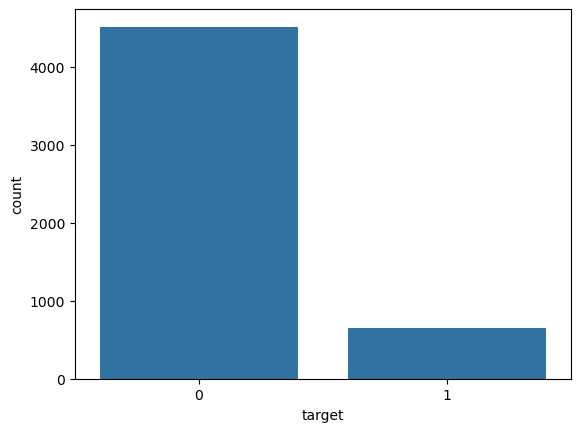

In [19]:
sns.barplot(data["target"].value_counts()) # Ploting the bar graph

### We observed from the barplot same things like :


Class 0 → 4516 rows

Class 1 → 653 rows

That means the dataset is imbalanced (class 0 is much larger than class 1).

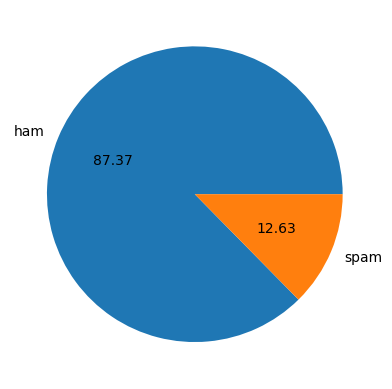

In [20]:
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f") # Ploting pie chart
plt.show()

### we observed form the pie chart 87.37% are ham and 12.63% are spam 

In [21]:
# Create a new feature 'num_char' which stores the number of characters in each message
data["num_char"] = data["text"].apply(len)
data.head(2)

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [22]:
import nltk

# Create a new feature 'num_words' which stores the number of words in each message
data["num_words"] = data["text"].apply(lambda x: len(nltk.word_tokenize(x)))
data.head(2)

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [23]:
# Create a new feature 'num_sent' which stores the number of words in each message
data["num_sent"] = data["text"].apply(lambda x : len(nltk.sent_tokenize(x)))
data.head(2)

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [24]:
# Generate summary statistics (count, mean, std, min, max, quartiles) 
# for the features: number of sentences, number of characters, and number of words
data[["num_sent","num_char","num_words"]].describe()

,num_sent,num_char,num_words
count,5169.000000,5169.000000,5169.000000
mean,1.965564,78.977945,18.455794
std,1.448541,58.236293,13.324758
min,1.000000,2.000000,1.000000
25%,1.000000,36.000000,9.000000
50%,1.000000,60.000000,15.000000
75%,2.000000,117.000000,26.000000
max,38.000000,910.000000,220.000000


In [25]:
# Generate summary statistics (count, mean, std, min, max, quartiles)
# for sentence count, character count, and word count
# but only for messages labeled as '1' (the positive/ minority class)
data[data["target"] == 1 ][["num_sent","num_char","num_words"]].describe()

,num_sent,num_char,num_words
count,653.000000,653.000000,653.000000
mean,2.970904,137.891271,27.667688
std,1.488425,30.137753,7.008418
min,1.000000,13.000000,2.000000
25%,2.000000,132.000000,25.000000
50%,3.000000,149.000000,29.000000
75%,4.000000,157.000000,32.000000
max,9.000000,224.000000,46.000000


In [26]:
# Generate summary statistics (count, mean, std, min, max, quartiles)
# for sentence count, character count, and word count
# but only for messages labeled as '0' (the positive/ minority class)
data[data["target"] == 0 ][["num_sent","num_char","num_words"]].describe()

,num_sent,num_char,num_words
count,4516.000000,4516.000000,4516.000000
mean,1.820195,70.459256,17.123782
std,1.383657,56.358207,13.493970
min,1.000000,2.000000,1.000000
25%,1.000000,34.000000,8.000000
50%,1.000000,52.000000,13.000000
75%,2.000000,90.000000,22.000000
max,38.000000,910.000000,220.000000


In [27]:
# Compute correlation matrix for numeric features only
corr_matrix = data.corr(numeric_only=True)

# Display correlation matrix
corr_matrix


,target,num_char,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


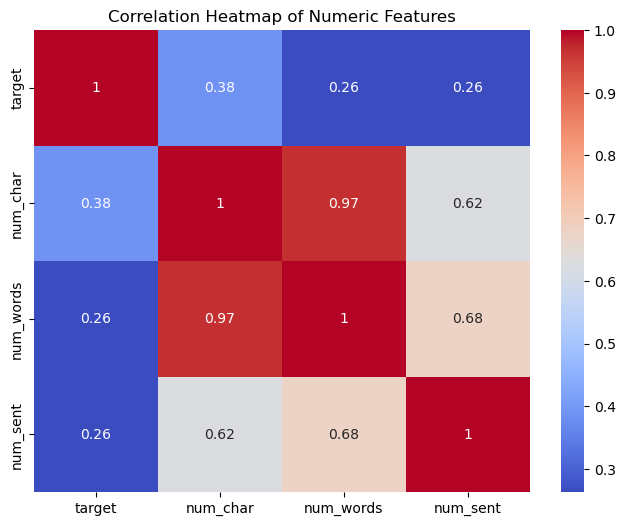

In [28]:
# Set figure size
plt.figure(figsize=(8,6))

# Plot heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")  # cmap is optional for colors

plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### What This Heatmap Shows:-

This is a correlation heatmap, which tells how strongly different numeric features are related to each other.

. Correlation values range from -1 to +1

. +1 → Perfect positive relationship (both increase together)

. 0 → No relationship

. -1 → Perfect negative relationship (one increases, other decreases)

### Key Insights / Comments You Can Use:-

. High multicollinearity detected between num_char and num_words (0.97) – including both in    a model like Logistic Regression could cause redundancy. Consider using one of them or       applying dimensionality reduction.

. target has only weak correlation with individual features – This suggests that spam          classification cannot rely only on numeric length features. You will likely need text-       based    features like TF-IDF, presence of links, special characters, or keyword frequency   for    stronger prediction.

. Sentence count has slightly better correlation with spam than total words – Maybe spam       messages tend to be shorter, more direct, or contain bullet-like phrases.

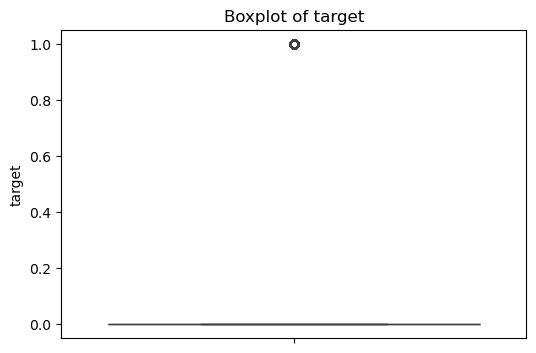

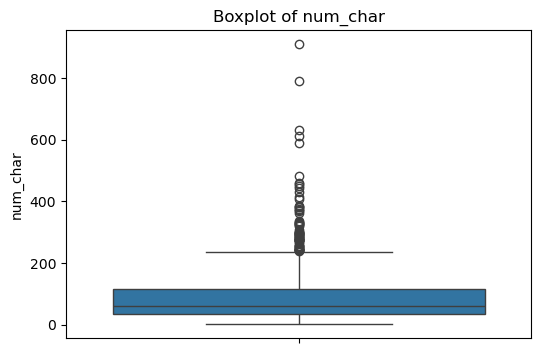

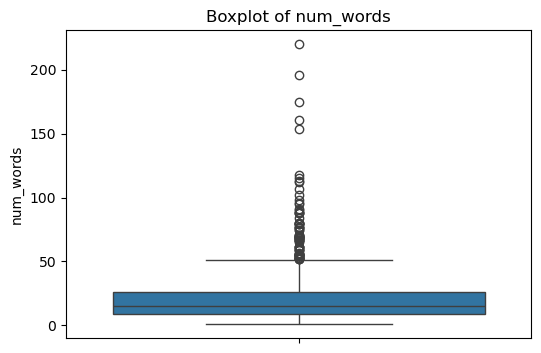

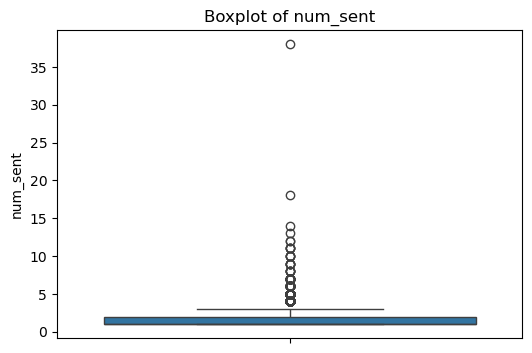

In [29]:
import warnings
# Ignore any warnings that might appear (optional, for cleaner output)
warnings.filterwarnings("ignore")

# Loop over all integer-type columns in the DataFrame
for i in data.select_dtypes(include='int').columns:
    
    # Create a new figure for each boxplot (so plots don't overlap)
    plt.figure(figsize=(6,4))
    
    # Create a boxplot for the current column
    sns.boxplot(y=data[i])
    
    # Add a title to the plot showing the column name
    plt.title(f'Boxplot of {i}')
    
    # Display the plot
    plt.show()


### In each numeric coloumns i observer outiler in each cols

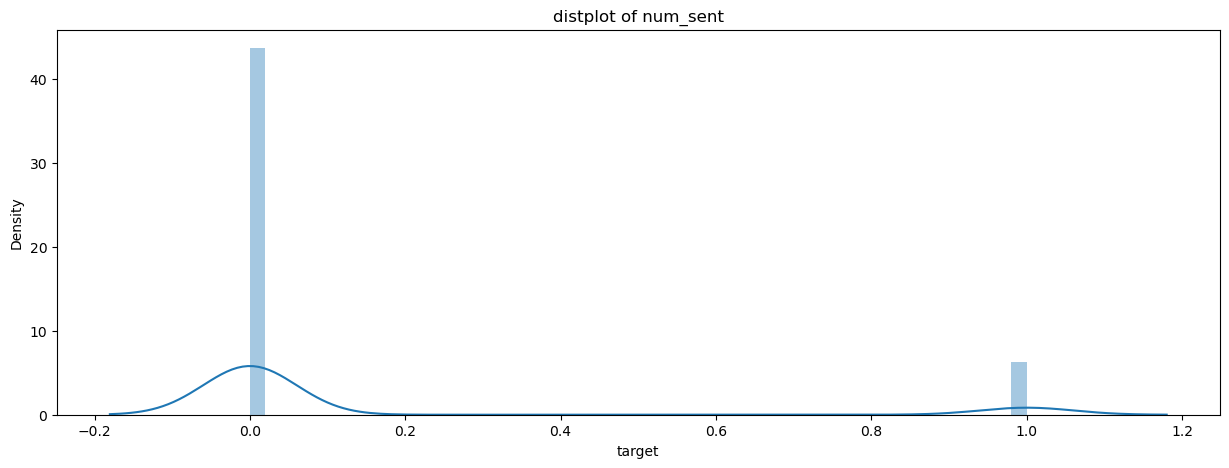

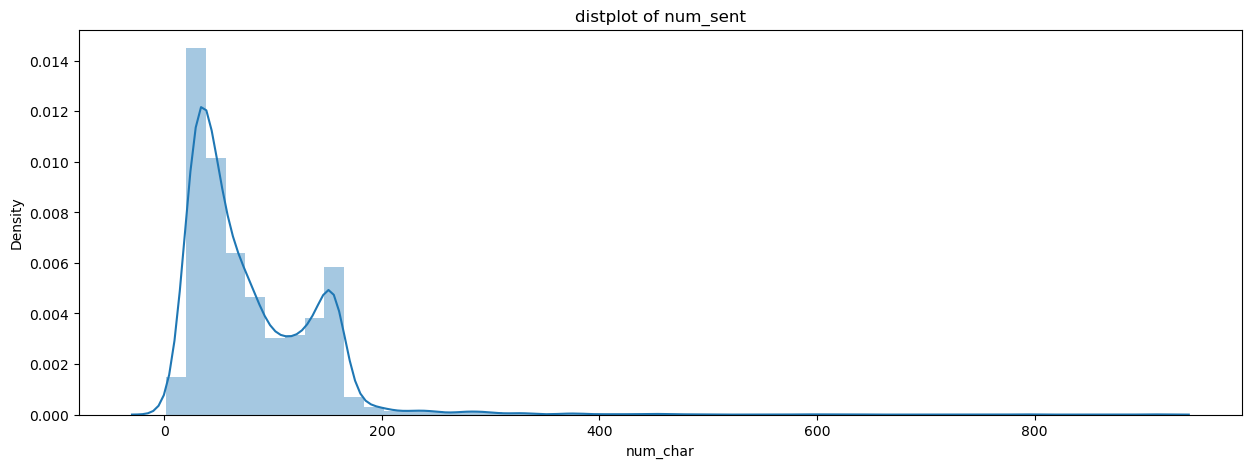

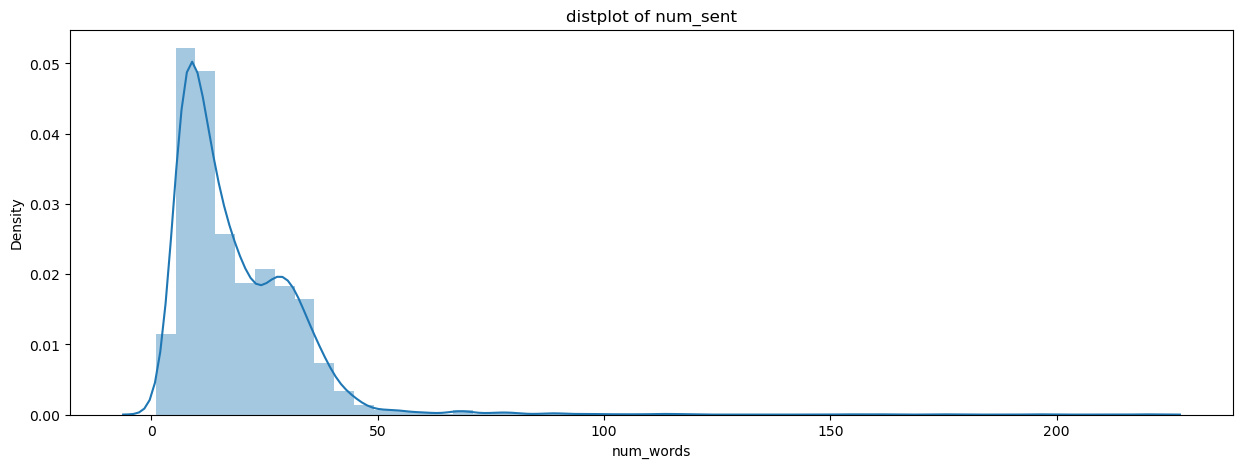

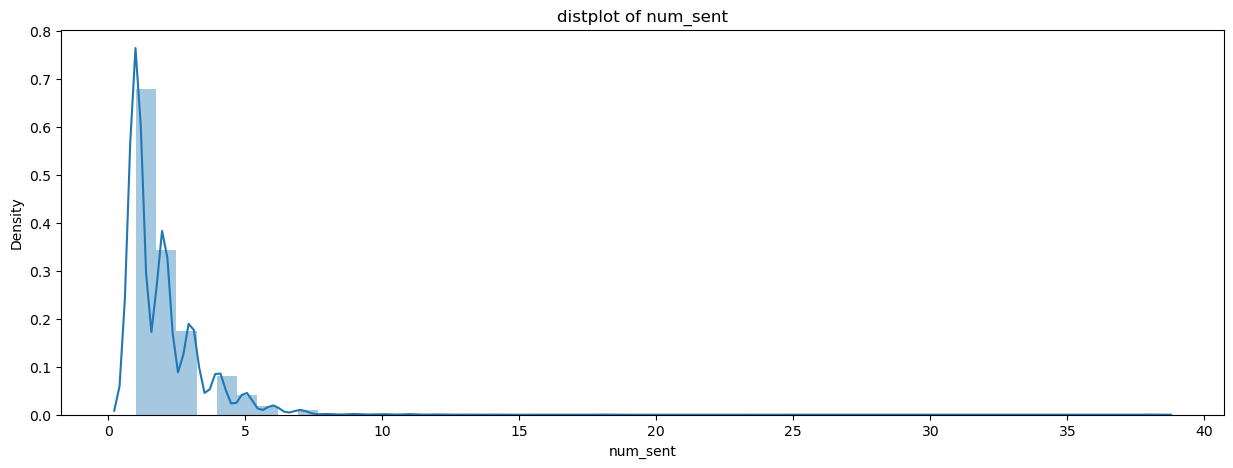

In [30]:
# Ignore any warnings that might appear (optional, for cleaner output)
for col in data.select_dtypes(include='int').columns:
    plt.figure(figsize = (15,5))
    sns.distplot(data[col])
    plt.title(f'distplot of {i}')

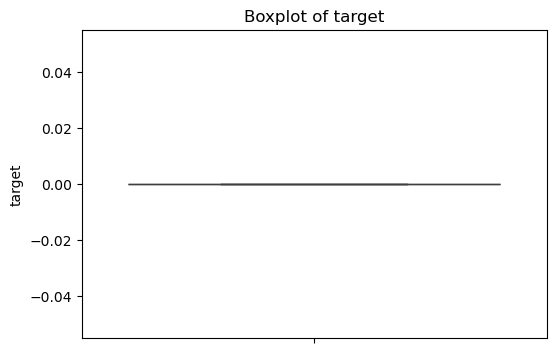

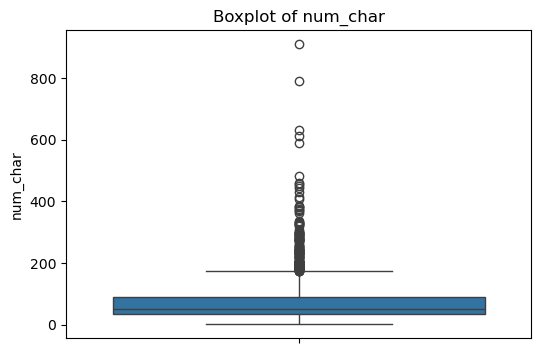

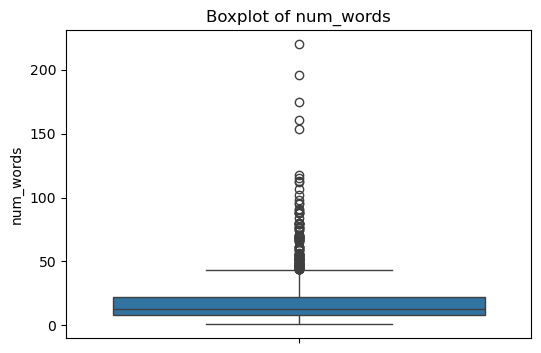

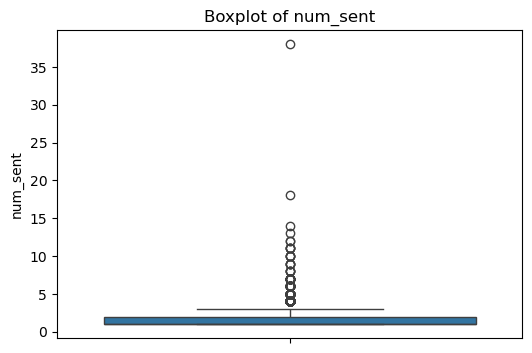

In [31]:
hame = data[data["target"] == 0] # creatign the datafram only for the hame 

# Loop over all integer-type columns in the DataFrame
for i in hame.select_dtypes(include='int').columns:
    # Create a new figure for each boxplot (so plots don't overlap)
    plt.figure(figsize=(6,4))
    
    # Create a boxplot for the current column
    sns.boxplot(y=hame[i])
    
    # Add a title to the plot showing the column name
    plt.title(f'Boxplot of {i}')
    
    # Display the plot
    plt.show()

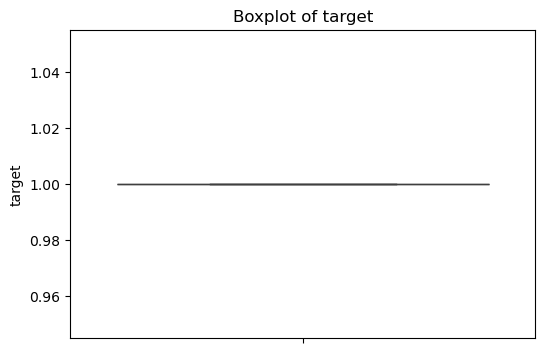

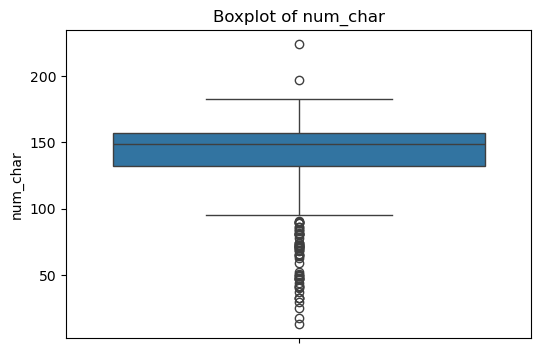

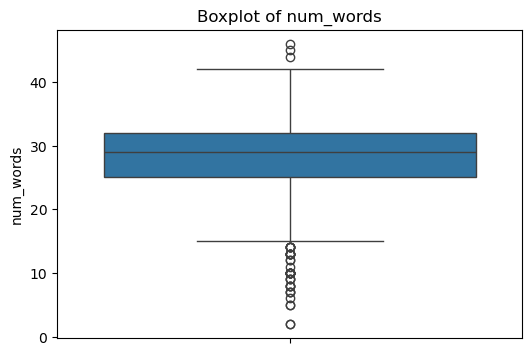

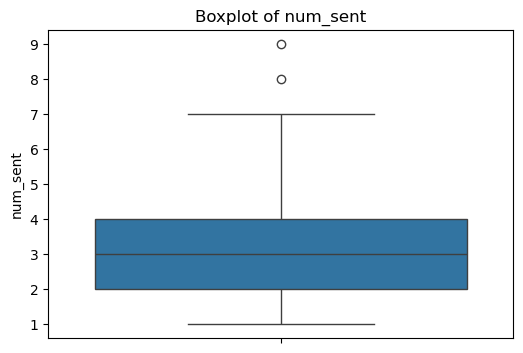

In [32]:
spam = data[data["target"] == 1] # creatign the datafram only for the spam 

# Loop over all integer-type columns in the DataFrame
for i in spam.select_dtypes(include='int').columns:
    # Create a new figure for each boxplot (so plots don't overlap)
    plt.figure(figsize=(6,4))
    
    # Create a boxplot for the current column
    sns.boxplot(y=spam[i])
    
    # Add a title to the plot showing the column name
    plt.title(f'Boxplot of {i}')
    
    # Display the plot
    plt.show()

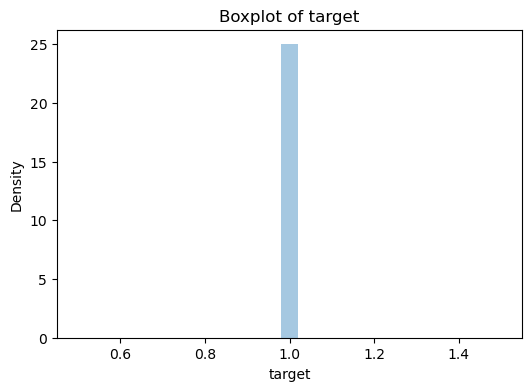

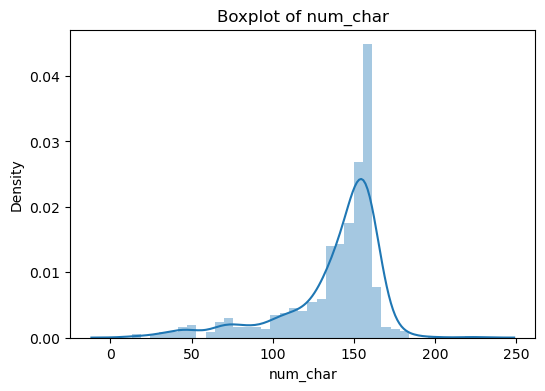

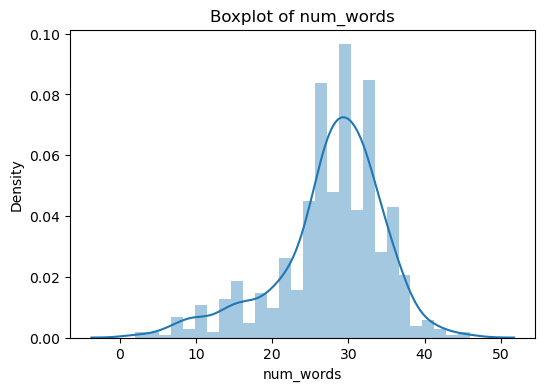

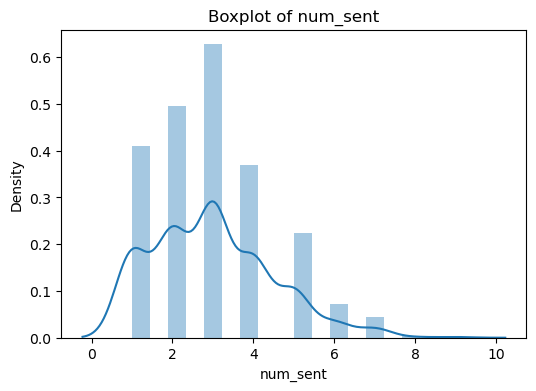

In [33]:
spam = data[data["target"] == 1] # creatign the datafram only for the hame 

# Loop over all integer-type columns in the DataFrame
for i in spam.select_dtypes(include='int').columns:
    # Create a new figure for each boxplot (so plots don't overlap)
    plt.figure(figsize=(6,4))
    
    # Create a boxplot for the current column
    sns.distplot(spam[i])
    
    # Add a title to the plot showing the column name
    plt.title(f'Boxplot of {i}')
    
    # Display the plot
    plt.show()

<Axes: xlabel='num_char', ylabel='Count'>

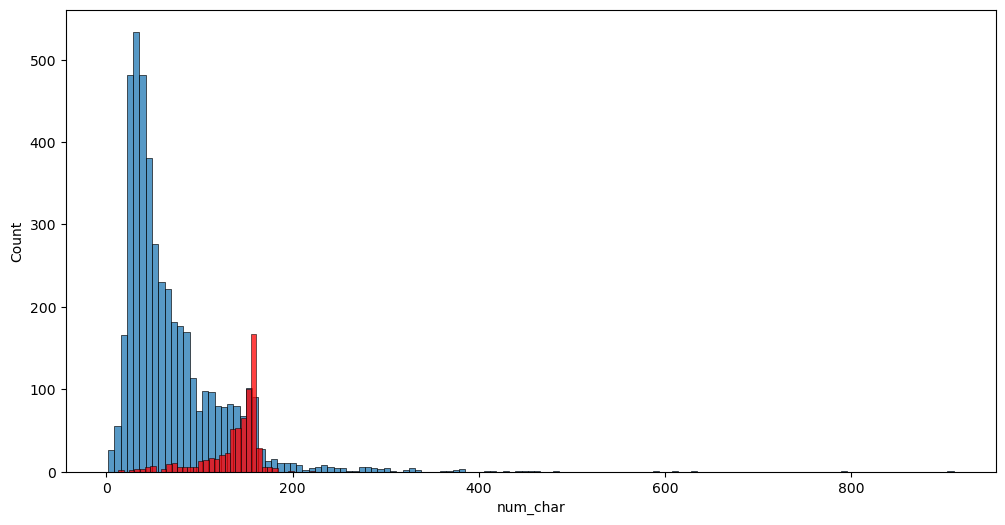

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_char'])
sns.histplot(data[data['target'] == 1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

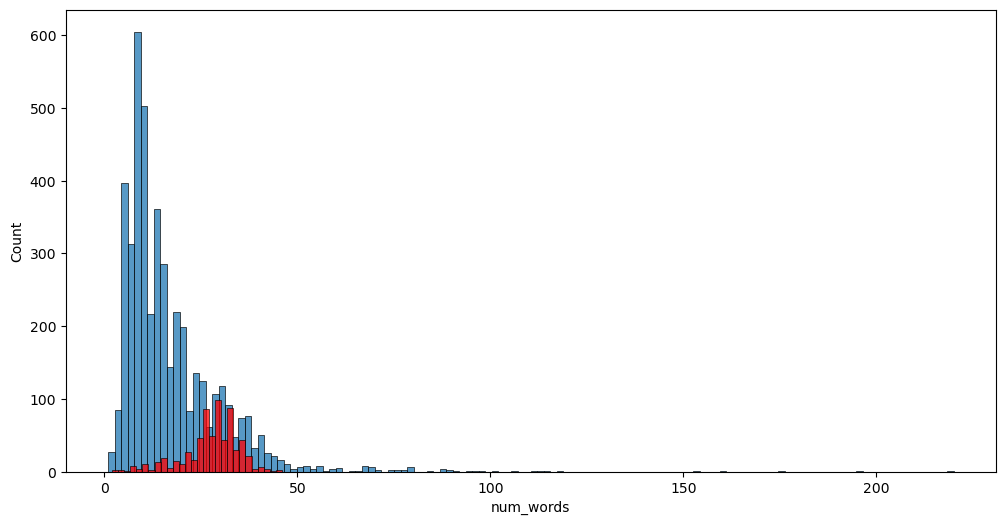

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

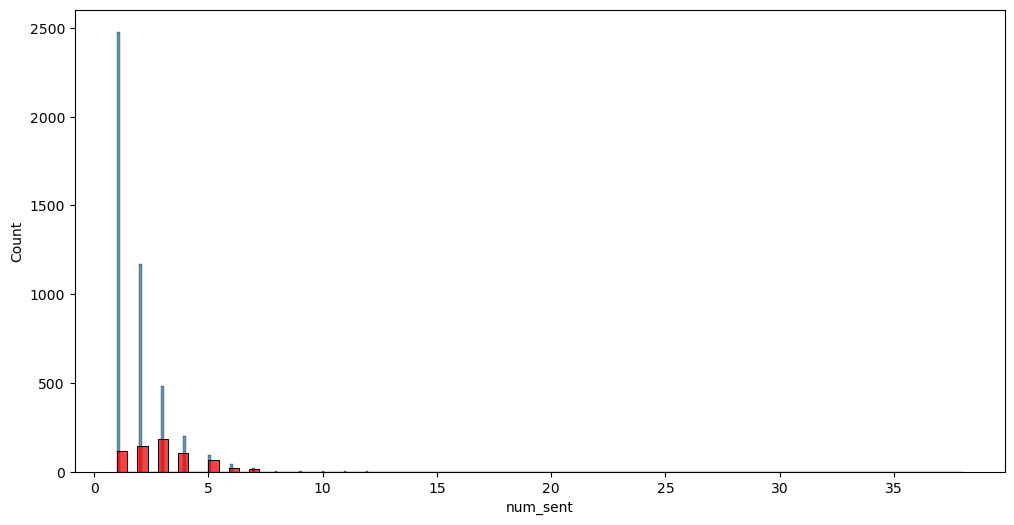

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_sent'])
sns.histplot(data[data['target'] == 1]['num_sent'],color='red')

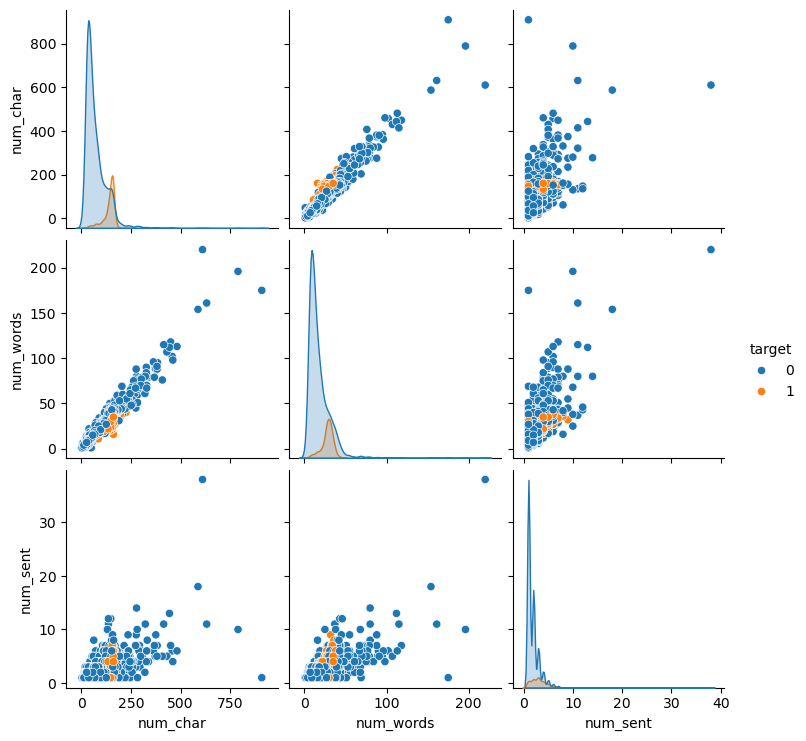

In [37]:
sns.pairplot(data,hue="target")

In [38]:
def iqr_range(col):
    # Calculate the first and third quartiles of the column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound and above the upper bound
    # Values below are set to lower_bound, above are set to upper_bound
    data[col] = np.where(
    data[col] < lower_bound, lower_bound,
        np.where(data[col] > upper_bound, upper_bound, data[col])
    )

In [39]:
col = ["num_sent","num_words","num_char"]
for i in col:
    iqr_range(i)

<Axes: ylabel='num_words'>

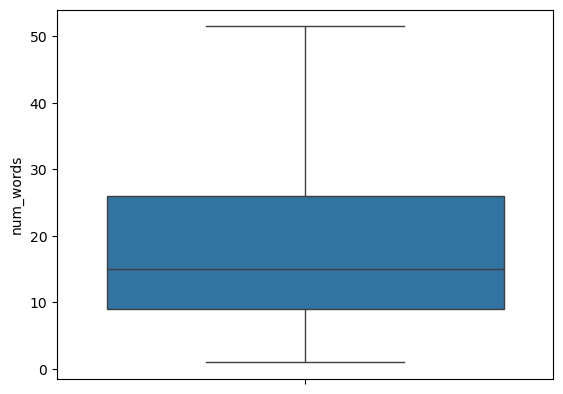

In [40]:
sns.boxplot(data["num_words"])

### 3. Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [41]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

In [42]:
def trf_text(text):
    text = text.lower() # converting upper case to lower case
    text = nltk.word_tokenize(text) # Tokenization 
    x = [] # empty list
    for i in text:
        if i.isalnum:
            x.append(i)
    text = x[:]  # copy the values of the x in text
    x.clear() # clear all values from the x

    for j in text:
        if j not in stopwords.words("english") and j not in string.punctuation:
            x.append(j)

    text = x[:]
    x.clear()

    for k in text:
        x.append(ps.stem(k))  # creating the stem like loving is love 
        
    return " ".join(x)

In [43]:
data["trf_text"] = data["text"].apply(trf_text)

In [44]:
data.head(5)

,target,text,num_char,num_words,num_sent,trf_text
0,0,"Go until jurong point, crazy.. Available only ...",111.0,24.0,2.0,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29.0,8.0,2.0,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,37.0,2.0,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49.0,13.0,1.0,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,15.0,1.0,nah n't think goe usf live around though


In [45]:
spam_cropus = []
for i in data[data["target"] == 1]["trf_text"].tolist():
    for j in i.split():
        spam_cropus.append(j)
spam_cropus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 "'s",
 'appli',
 '08452810075over18',
 "'s",
 'freemsg',
 'hey',
 'darl',
 "'s",
 '3',
 'week',
 "'s",
 'word',
 'back',
 "'d",
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å£1.50',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461.',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 '20,000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575.',
 'cost',
 '150p/day',
 '6day',
 '16+',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'w

In [46]:
hame_cropus = []
for i in data[data["target"] == 0]["trf_text"].tolist():
    for j in i.split():
        hame_cropus.append(j)
hame_cropus

['go',
 'jurong',
 'point',
 'crazi',
 '..',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'got',
 'amor',
 'wat',
 '...',
 'ok',
 'lar',
 '...',
 'joke',
 'wif',
 'u',
 'oni',
 '...',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 '...',
 'u',
 'c',
 'alreadi',
 'say',
 '...',
 'nah',
 "n't",
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 "'mell",
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 "'m",
 'gon',
 'na',
 'home',
 'soon',
 "n't",
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 "'ve",
 'cri',
 'enough',
 'today',
 "'ve",
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 '...',
 "'m",
 'watch',
 '

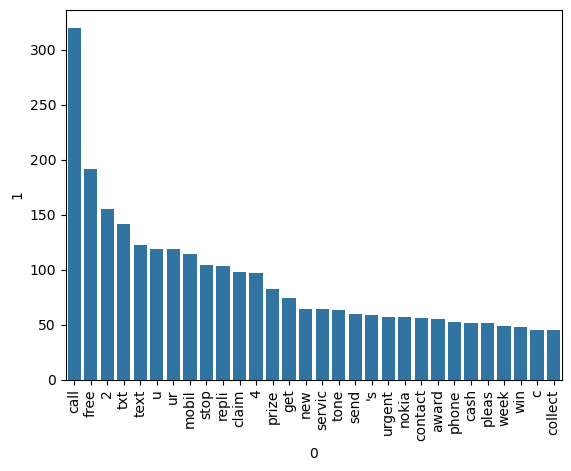

In [47]:
from collections import Counter

# Get the 30 most common items for the spam
most_common_30 = Counter(spam_cropus).most_common(30)

# Convert to DataFrame
df_common = pd.DataFrame(most_common_30)

# Create barplot
sns.barplot(x=0, y=1, data=df_common)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')
plt.show()


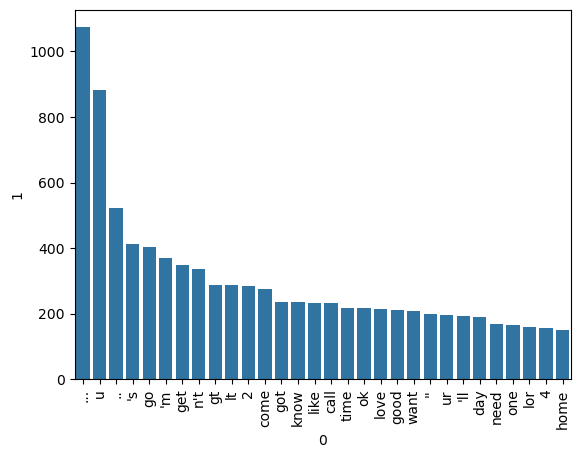

In [48]:
# Get the 30 most common items for the hame
most_common_30_hame = Counter(hame_cropus).most_common(30)

# Convert to DataFrame
df_common_hame = pd.DataFrame(most_common_30_hame)

# Create barplot
sns.barplot(x=0, y=1, data=df_common_hame)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')
plt.show()


In [49]:
# Import the WordCloud class from the wordcloud library
from wordcloud import WordCloud

# Create a WordCloud object with specific parameters
wc = WordCloud(
    width=500,            # Width of the canvas in pixels
    height=500,           # Height of the canvas in pixels
    min_font_size=10,     # Minimum font size for the smallest word
    background_color="white"  # Background color of the WordCloud
)

# Generate the WordCloud for spam messages (target == 1)
# 1. Select rows where target == 1
# 2. Access the "trf_text" column
# 3. Concatenate all text into a single string using .str.cat(sep=" ")
spam_wc = wc.generate(
    data[data["target"] == 1]["trf_text"].str.cat(sep=" ")
)


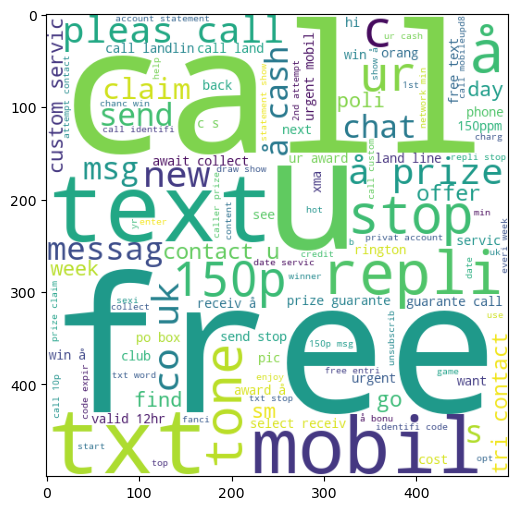

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

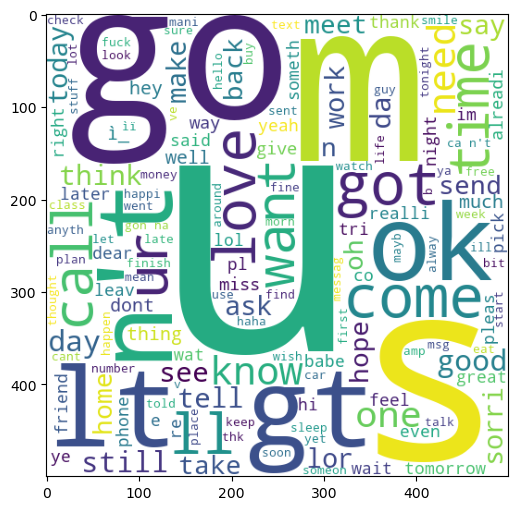

In [51]:
# Create a WordCloud object with specific parameters
wc = WordCloud(
    width=500,            # Width of the canvas in pixels
    height=500,           # Height of the canvas in pixels
    min_font_size=10,     # Minimum font size for the smallest word
    background_color="white"  # Background color of the WordCloud
)

# Generate the WordCloud for spam messages (target == 1)
# 1. Select rows where target == 0
# 2. Access the "trf_text" column
# 3. Concatenate all text into a single string using .str.cat(sep=" ")
hame_wc = wc.generate(
    data[data["target"] == 0]["trf_text"].str.cat(sep=" ")
)
plt.figure(figsize=(15,6))
plt.imshow(hame_wc)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [53]:
tf= TfidfVectorizer(max_features=3000)
x = tf.fit_transform(data["trf_text"]).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
x.shape

(5169, 3000)

In [55]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import MinMaxScaler

In [56]:
g = GaussianNB()
b = BernoulliNB()
m = MultinomialNB()

In [57]:
y= data["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
# x = np.hstack((x,data["num_words"].values.reshape(-1,1)))
# x = np.hstack((x,data["num_char"].values.reshape(-1,1)))

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [60]:
# sc = MinMaxScaler()
# x_train_trf = sc.fit_transform(x_train)
# x_test_trf = sc.transform(x_test)

In [61]:
g.fit(x_train,y_train)
b.fit(x_train,y_train)
m.fit(x_train,y_train)

MultinomialNB()

In [62]:
y_pred_g = g.predict(x_test)
y_pred_b = b.predict(x_test)
y_pred_m = m.predict(x_test)

In [63]:
print(f"accuracy of g is :{accuracy_score(y_test,y_pred_g)}")
print(f"accuracy of b is :{accuracy_score(y_test,y_pred_b)}")
print(f"accuracy of m is :{accuracy_score(y_test,y_pred_m)}")

accuracy of g is :0.8781431334622823
accuracy of b is :0.988394584139265
accuracy of m is :0.9748549323017408


In [64]:
print(f"precision_score of g is :{precision_score(y_test,y_pred_g)}")
print(f"precision_score of b is :{precision_score(y_test,y_pred_b)}")
print(f"precision_score of m is :{precision_score(y_test,y_pred_m)}")

precision_score of g is :0.5267857142857143
precision_score of b is :1.0
precision_score of m is :1.0


In [65]:
print(f"conf_matrix of g is :{confusion_matrix(y_test,y_pred_g)}")
print(f"conf_matrix of b is :{confusion_matrix(y_test,y_pred_b)}")
print(f"conf_matrix of m is :{confusion_matrix(y_test,y_pred_m)}")

conf_matrix of g is :[[790 106]
 [ 20 118]]
conf_matrix of b is :[[896   0]
 [ 12 126]]
conf_matrix of m is :[[896   0]
 [ 26 112]]


In [66]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [69]:
def train_clf(clf,x_train_trf,x_test_trf,y_train,y_test):
    clf.fit(x_train_trf,y_train)
    y_pred = clf.predict(x_test_trf)
    accuracy = accuracy_score(y_test,y_pred)
    precison = precision_score(y_test,y_pred)
    return accuracy,precison

In [70]:
train_clf(clfs['SVC'],x_train,x_test,y_train,y_test)

(0.9777562862669246, 0.9752066115702479)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    accuracy,precison = train_clf(clf,x_train,x_test,y_train,y_test)
    print("for :-",name)
    print("accuracy :-",accuracy)
    print("precison :-",precison)
    print()
    accuracy_scores.append(accuracy)
    precision_scores.append(precison)

for :- SVC
accuracy :- 0.9777562862669246
precison :- 0.9752066115702479



  File "C:\Users\Amita\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Amita\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Amita\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Amita\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


for :- KN
accuracy :- 0.9042553191489362
precison :- 1.0

for :- NB
accuracy :- 0.9748549323017408
precison :- 1.0

for :- DT
accuracy :- 0.9342359767891683
precison :- 0.8645833333333334

for :- LR
accuracy :- 0.9584139264990329
precison :- 0.9523809523809523

for :- RF
accuracy :- 0.9758220502901354
precison :- 0.9829059829059829

for :- AdaBoost
accuracy :- 0.9729206963249516
precison :- 0.9583333333333334

for :- BgC
accuracy :- 0.9564796905222437
precison :- 0.8444444444444444

for :- ETC
accuracy :- 0.9806576402321083
precison :- 0.9758064516129032

for :- GBDT
accuracy :- 0.9497098646034816
precison :- 0.9387755102040817

for :- xgb
accuracy :- 0.9748549323017408
precison :- 0.9590163934426229



In [72]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Amita\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: dtreeviz, imbalanced-learn, mlxtend
Note: you may need to restart the kernel to use updated packages.
